In [34]:
pip install numpy pandas matplotlib seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [35]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_seq_items = 300000
pd.options.display.max_rows = 300000
pd.options.display.max_columns = 100
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', None)    

In [36]:
purchase_data = pd.read_csv("Purchase_data.csv")
transaction_data = pd.read_csv("transaction_data.csv")

In [37]:
print("Shape of data sets : \n")
print("purchase_data : ", purchase_data.shape, "\ntransaction_data : ", transaction_data.shape)

Shape of data sets : 

purchase_data :  (72637, 3) 
transaction_data :  (264836, 8)


In [38]:
print("Transactions Dataset Overview:")
display(transaction_data.head())

print("\nCustomers Dataset Overview:")
display(purchase_data.head())

Transactions Dataset Overview:


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8



Customers Dataset Overview:


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [39]:
purchase_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [40]:
transaction_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264836 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DATE            264836 non-null  int64  
 1   STORE_NBR       264836 non-null  int64  
 2   LYLTY_CARD_NBR  264836 non-null  int64  
 3   TXN_ID          264836 non-null  int64  
 4   PROD_NBR        264836 non-null  int64  
 5   PROD_NAME       264836 non-null  object 
 6   PROD_QTY        264836 non-null  int64  
 7   TOT_SALES       264836 non-null  float64
dtypes: float64(1), int64(6), object(1)
memory usage: 16.2+ MB


In [41]:
purchase_data.describe().T

,count,mean,std,min,25%,50%,75%,max
LYLTY_CARD_NBR,72637.0,136185.93177,89892.932014,1000.0,66202.0,134040.0,203375.0,2373711.0


In [42]:
transaction_data.describe().T

,count,mean,std,min,25%,50%,75%,max
DATE,264836.0,43464.036260,105.389282,43282.0,43373.0,43464.0,43555.00,43646.0
STORE_NBR,264836.0,135.080110,76.784180,1.0,70.0,130.0,203.00,272.0
LYLTY_CARD_NBR,264836.0,135549.476404,80579.978022,1000.0,70021.0,130357.5,203094.25,2373711.0
TXN_ID,264836.0,135158.310815,78133.026026,1.0,67601.5,135137.5,202701.25,2415841.0
PROD_NBR,264836.0,56.583157,32.826638,1.0,28.0,56.0,85.00,114.0
PROD_QTY,264836.0,1.907309,0.643654,1.0,2.0,2.0,2.00,200.0
TOT_SALES,264836.0,7.304200,3.083226,1.5,5.4,7.4,9.20,650.0


In [43]:
# List categorical columns for both datasets
cat_cols_transaction = ["STORE_NBR", "PROD_NBR", "PROD_NAME"]
cat_cols_purchase = ["LIFESTAGE", "PREMIUM_CUSTOMER"]

# Unique values and counts in transaction_data
print("\nUnique Values in transaction_data:")
for col in cat_cols_transaction:
    print(f"{col}: {transaction_data[col].nunique()} unique values")
    print(transaction_data[col].unique()[:10])  # Display first 10 unique values for preview

# Unique values and counts in purchase_data
print("\nUnique Values in purchase_data:")
for col in cat_cols_purchase:
    print(f"{col}: {purchase_data[col].nunique()} unique values")
    print(purchase_data[col].unique()) 


Unique Values in transaction_data:
STORE_NBR: 272 unique values
[ 1  2  4  5  7  8  9 13 19 20]
PROD_NBR: 114 unique values
[  5  66  61  69 108  57  16  24  42  52]
PROD_NAME: 114 unique values
['Natural Chip        Compny SeaSalt175g' 'CCs Nacho Cheese    175g'
 'Smiths Crinkle Cut  Chips Chicken 170g'
 'Smiths Chip Thinly  S/Cream&Onion 175g'
 'Kettle Tortilla ChpsHny&Jlpno Chili 150g'
 'Old El Paso Salsa   Dip Tomato Mild 300g'
 'Smiths Crinkle Chips Salt & Vinegar 330g'
 'Grain Waves         Sweet Chilli 210g'
 'Doritos Corn Chip Mexican Jalapeno 150g'
 'Grain Waves Sour    Cream&Chives 210G']

Unique Values in purchase_data:
LIFESTAGE: 7 unique values
['YOUNG SINGLES/COUPLES' 'YOUNG FAMILIES' 'OLDER SINGLES/COUPLES'
 'MIDAGE SINGLES/COUPLES' 'NEW FAMILIES' 'OLDER FAMILIES' 'RETIREES']
PREMIUM_CUSTOMER: 3 unique values
['Premium' 'Mainstream' 'Budget']


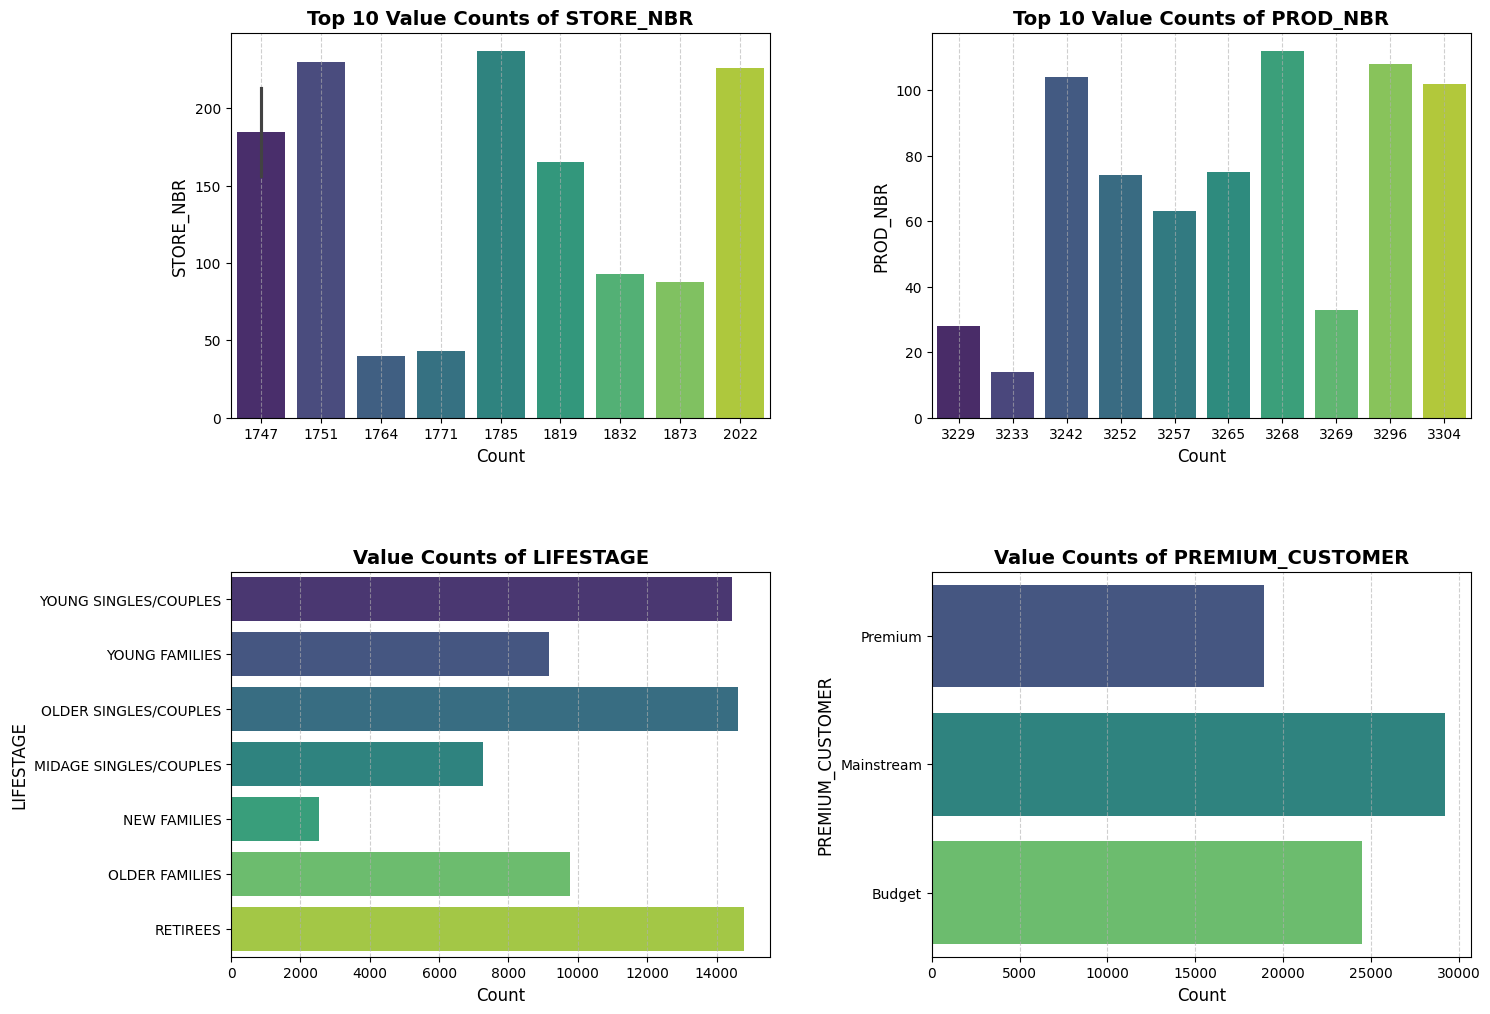

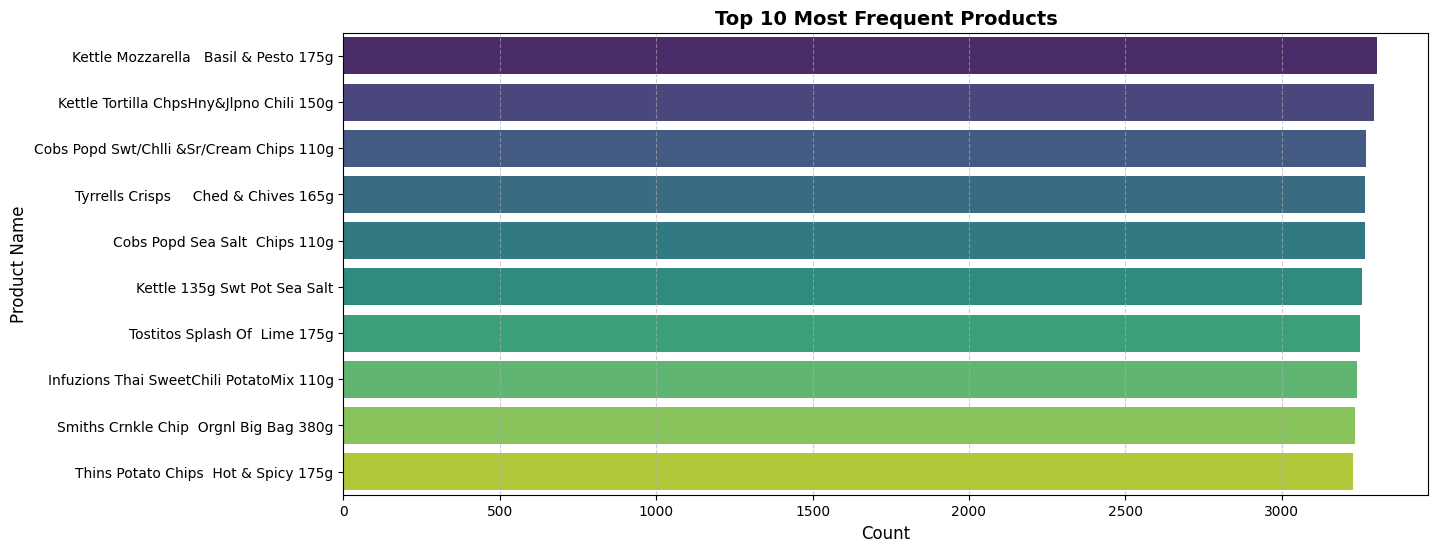

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define categorical columns
cat_cols_transaction = ["STORE_NBR", "PROD_NBR"]
cat_cols_purchase = ["LIFESTAGE", "PREMIUM_CUSTOMER"]

# Separate PROD_NAME because it has too many categories
num_plots = len(cat_cols_transaction) + len(cat_cols_purchase)  # Total plots excluding PROD_NAME

# Set up subplots dynamically (without PROD_NAME)
fig, axes = plt.subplots(nrows=(num_plots // 2) + (num_plots % 2), ncols=2, figsize=(16, 12))
axes = axes.flatten()

# Function to plot top 10 categories
def plot_top_10(data, col, ax):
    top_10 = data[col].value_counts().head(10)  # Top 10 values
    sns.barplot(x=top_10.values, y=top_10.index, ax=ax, palette="viridis")
    ax.set_title(f'Top 10 Value Counts of {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel("Count", fontsize=12)
    ax.set_ylabel(col, fontsize=12)
    ax.grid(axis="x", linestyle="--", alpha=0.6)

# Plot transaction data categorical variables (excluding PROD_NAME)
for i, col in enumerate(cat_cols_transaction):
    plot_top_10(transaction_data, col, axes[i])

# Plot purchase data categorical variables
for i, col in enumerate(cat_cols_purchase):
    sns.countplot(y=purchase_data[col], ax=axes[i + len(cat_cols_transaction)], palette="viridis")
    axes[i + len(cat_cols_transaction)].set_title(f'Value Counts of {col}', fontsize=14, fontweight='bold')
    axes[i + len(cat_cols_transaction)].set_xlabel("Count", fontsize=12)
    axes[i + len(cat_cols_transaction)].set_ylabel(col, fontsize=12)
    axes[i + len(cat_cols_transaction)].grid(axis="x", linestyle="--", alpha=0.6)

for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout for better spacing
plt.subplots_adjust(hspace=0.4, wspace=0.3)
plt.show()

# Separate plot for PROD_NAME
plt.figure(figsize=(14, 6))
top_10_products = transaction_data["PROD_NAME"].value_counts().head(10)
sns.barplot(x=top_10_products.values, y=top_10_products.index, palette="viridis")
plt.title("Top 10 Most Frequent Products", fontsize=14, fontweight="bold")
plt.xlabel("Count", fontsize=12)
plt.ylabel("Product Name", fontsize=12)
plt.grid(axis="x", linestyle="--", alpha=0.6)
plt.show()

In [45]:
# Group by customer ID and sum total sales
top_profitable_customers = (
    transaction_data.groupby("LYLTY_CARD_NBR")["TOT_SALES"]
    .sum()
    .nlargest(3)
    .reset_index()
)

# Merge with customer data for more details
top_profitable_customers = top_profitable_customers.merge(purchase_data, on="LYLTY_CARD_NBR")

print("Top 3 Most Profitable Customers:")
print(top_profitable_customers)


Top 3 Most Profitable Customers:
   LYLTY_CARD_NBR  TOT_SALES       LIFESTAGE PREMIUM_CUSTOMER
0          226000     1300.0  OLDER FAMILIES          Premium
1          230078      138.6  OLDER FAMILIES           Budget
2           63197      132.8  OLDER FAMILIES           Budget


In [46]:
# Group by customer ID and count transactions
top_loyal_customers = (
    transaction_data.groupby("LYLTY_CARD_NBR")["TXN_ID"]
    .count()
    .nlargest(3)
    .reset_index()
)

# Merge with customer data for more details
top_loyal_customers = top_loyal_customers.merge(purchase_data, on="LYLTY_CARD_NBR")

print("Top 3 Most Loyal Customers:")
print(top_loyal_customers)


Top 3 Most Loyal Customers:
   LYLTY_CARD_NBR  TXN_ID              LIFESTAGE PREMIUM_CUSTOMER
0          162039      18         OLDER FAMILIES       Mainstream
1          172032      18  YOUNG SINGLES/COUPLES       Mainstream
2           13138      17         YOUNG FAMILIES       Mainstream


In [47]:
# Group by product name and sum quantity sold
bestselling_products = (
    transaction_data.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"]
    .sum()
    .nlargest(3)
    .reset_index()
)

print("Top 3 Bestselling Products:")
print(bestselling_products)


Top 3 Bestselling Products:
   PROD_NBR                                 PROD_NAME  TOT_SALES
0         4          Dorito Corn Chp     Supreme 380g    40352.0
1        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
2        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2


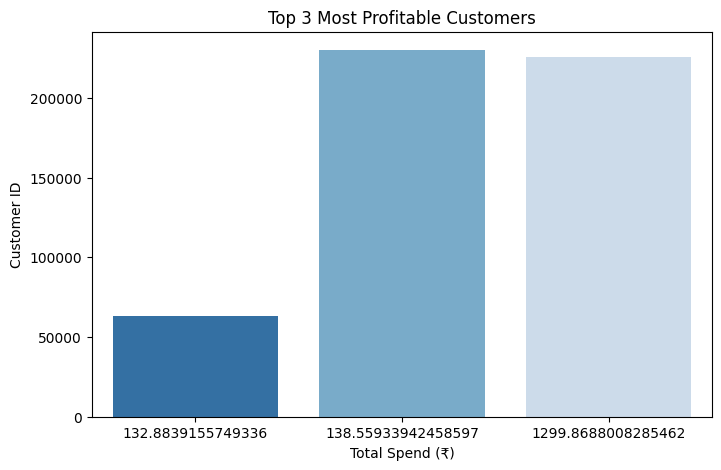

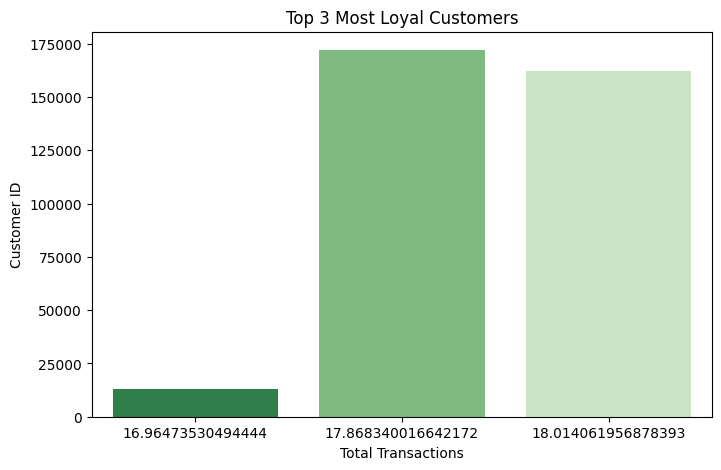

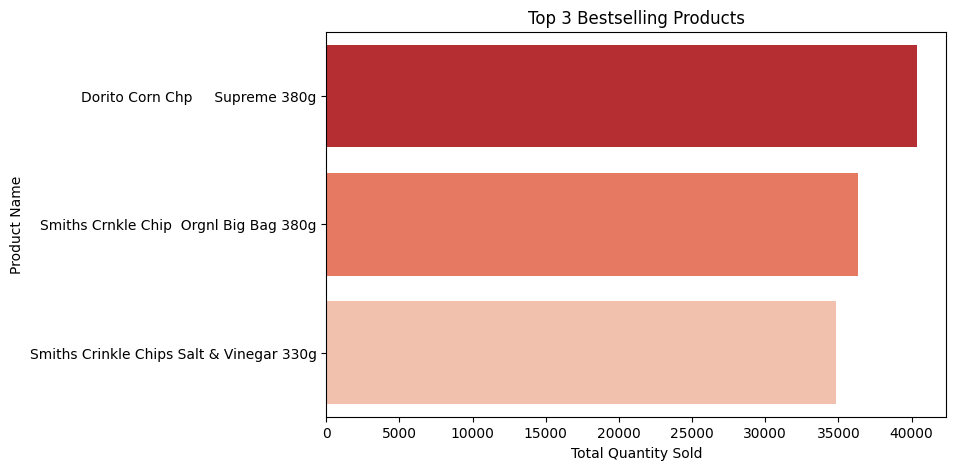

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def add_jitter(values):
    jitter = np.random.normal(0, 0.1, len(values)) 
    return values + jitter

plt.figure(figsize=(8, 5))
top_profitable_customers["TOT_SALES_jittered"] = add_jitter(top_profitable_customers["TOT_SALES"])
sns.barplot(x=top_profitable_customers["TOT_SALES_jittered"], y=top_profitable_customers["LYLTY_CARD_NBR"], palette="Blues_r")
plt.xlabel("Total Spend (₹)")
plt.ylabel("Customer ID")
plt.title("Top 3 Most Profitable Customers")
plt.show()

plt.figure(figsize=(8, 5))
top_loyal_customers["TXN_ID_jittered"] = add_jitter(top_loyal_customers["TXN_ID"])
sns.barplot(x=top_loyal_customers["TXN_ID_jittered"], y=top_loyal_customers["LYLTY_CARD_NBR"], palette="Greens_r")
plt.xlabel("Total Transactions")
plt.ylabel("Customer ID")
plt.title("Top 3 Most Loyal Customers")
plt.show()

plt.figure(figsize=(8, 5))
sns.barplot(x=bestselling_products["TOT_SALES"], y=bestselling_products["PROD_NAME"], palette="Reds_r")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Name")
plt.title("Top 3 Bestselling Products")
plt.show()
